In [1]:
import oommfc as oc
import numpy as np
import discretisedfield as df
%matplotlib inline

# Exploring different matplotlib plotting styles

First, we run a short simulation to have some data. Then we plot it in different styles.

In [2]:
mesh = oc.Mesh(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9), 
               cell=(5e-9, 5.0e-9, 10e-9))

def m_initial(pos):  
    """Function to prime some dynamics"""
    x, y, z = pos
    if np.sqrt(x**2 + y**2) < 20e-9:
        return (0, 0.1, -1)
    else:
        return (0, 0, 1)
    
system = oc.System(name="skyrmion")
system.hamiltonian = oc.Exchange(A=8.78e-12) + \
                     oc.Zeeman(H=(0, 0, 1e5)) + \
                     oc.Demag()
                     # oc.DMI(D=1.58e-3) + \
                     
                     # oc.UniaxialAnisotropy(K=1e3, u=(0, 0, 1)) + \
                     #oc.Demag()
system.dynamics = oc.Precession(gamma=2.211e5) + oc.Damping(alpha=0.1)
system.m = df.Field(mesh, value=m_initial, norm=384e3)
system.hamiltonian

Exchange(A=8.78e-12) + Zeeman(H=(0, 0, 100000.0)) + Demag()

In [3]:
td = oc.TimeDriver()
td.drive(system, t=3e-9, n=200)

2017/3/20 18:36: Calling OOMMF (skyrmion/skyrmion.mif) ... [5.4s]


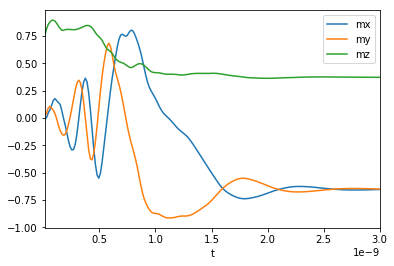

In [4]:
system.dt.plot('t', ['mx', 'my', 'mz'])

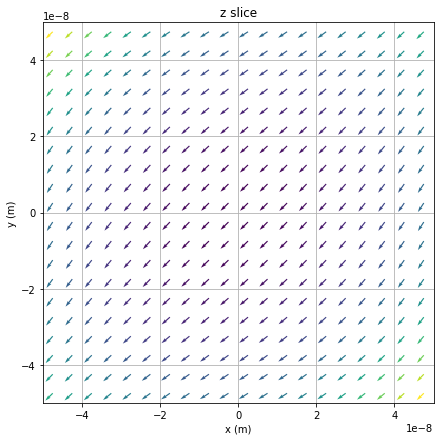

In [5]:
system.m.plot_slice('z', 0, xsize=7);

# Show each of these plots in different style

In [6]:
import matplotlib.pyplot as plt


In [7]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

The code in the next cell is ugly. But it shows the default styles coming with matplotlib 2.

This is style bmh
This is style classic
This is style dark_background
This is style fivethirtyeight
This is style ggplot
This is style grayscale
This is style seaborn-bright
This is style seaborn-colorblind
This is style seaborn-dark-palette
This is style seaborn-dark
This is style seaborn-darkgrid
This is style seaborn-deep


/Users/fangohr/anaconda3/envs/joommf/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is style seaborn-muted
This is style seaborn-notebook
This is style seaborn-paper
This is style seaborn-pastel
This is style seaborn-poster
This is style seaborn-talk
This is style seaborn-ticks
This is style seaborn-white
This is style seaborn-whitegrid
This is style seaborn


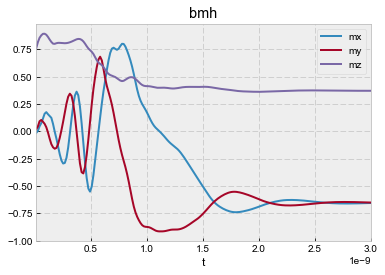

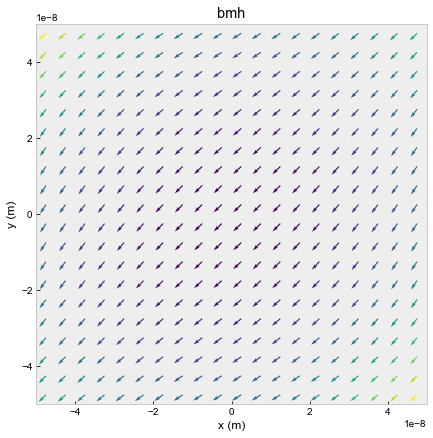

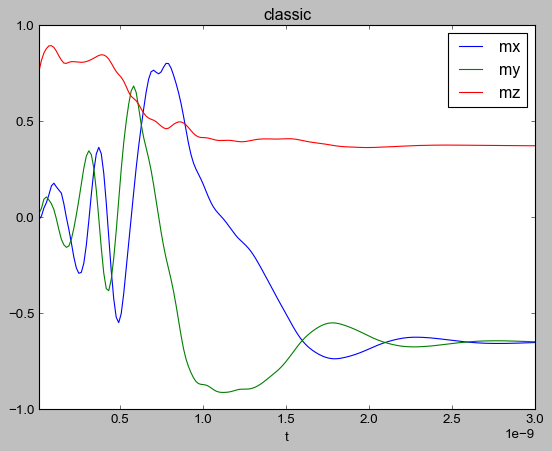

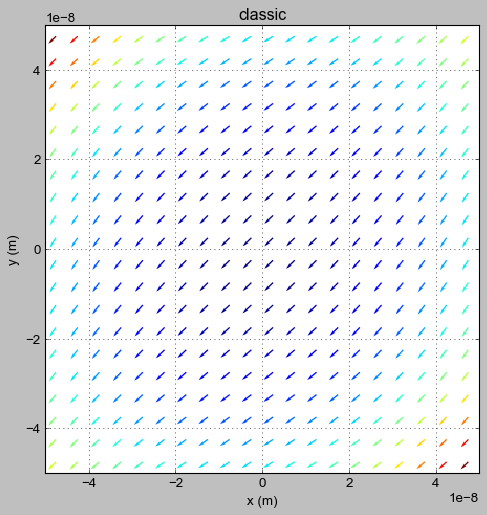

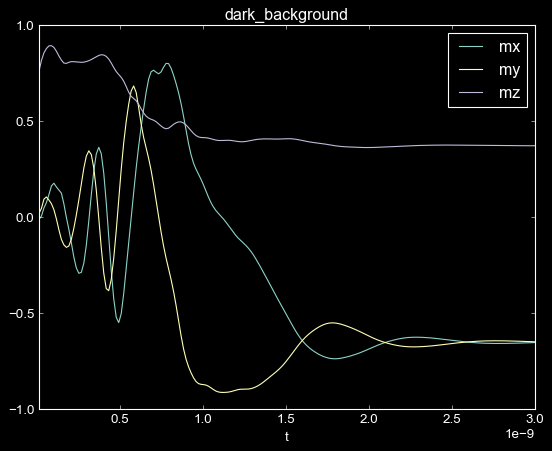

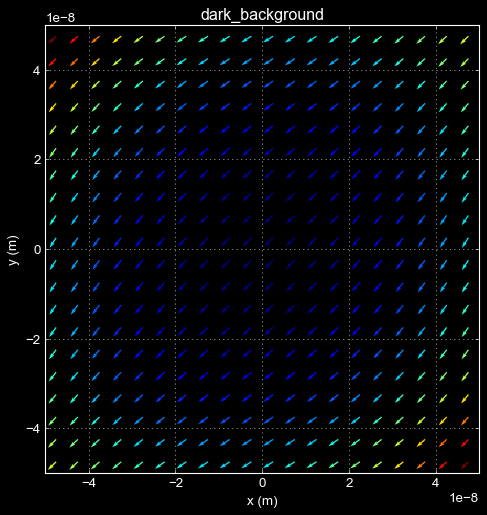

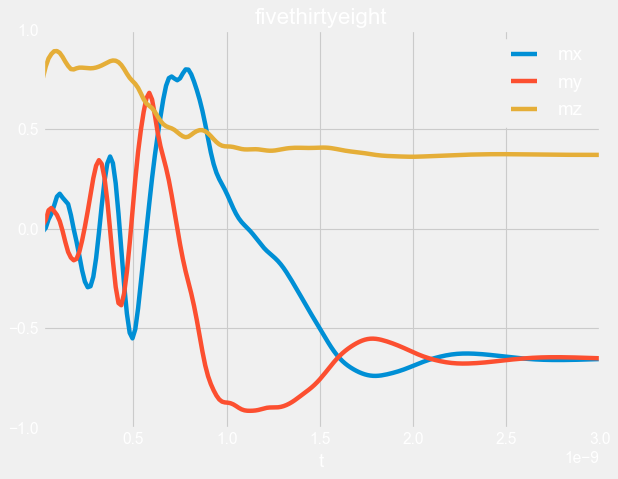

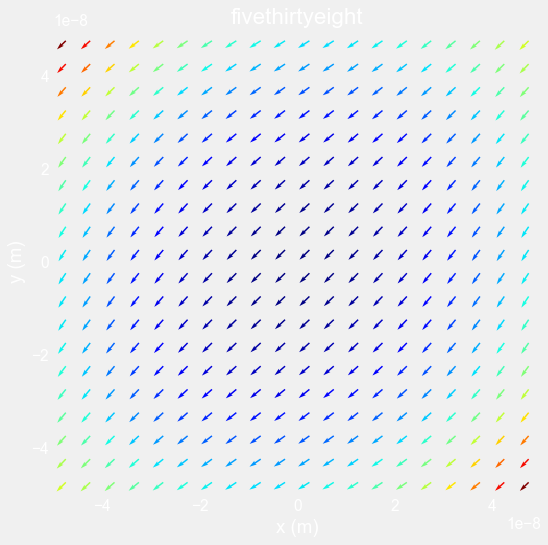

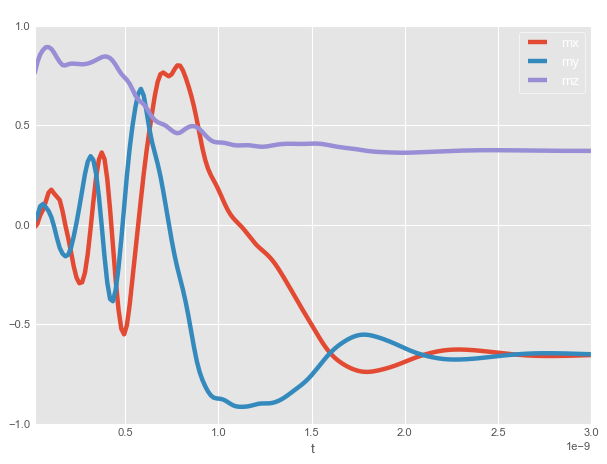

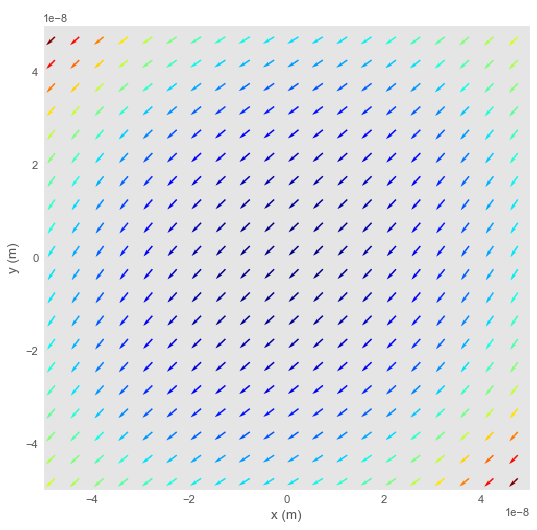

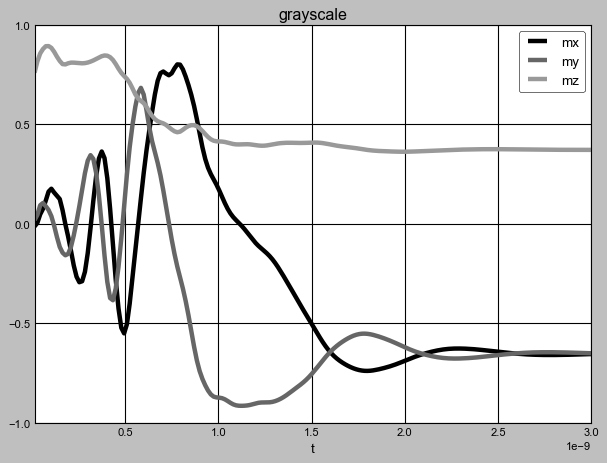

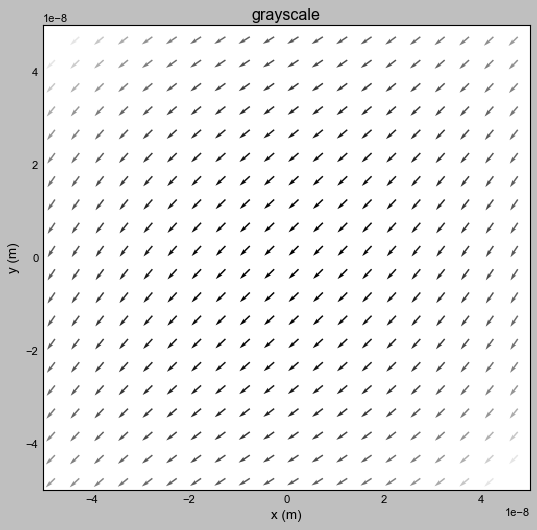

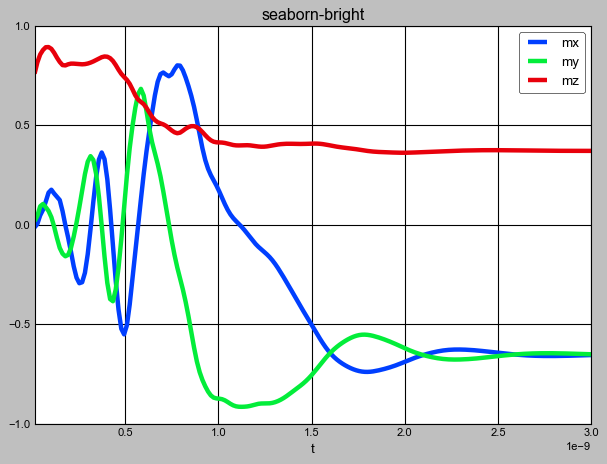

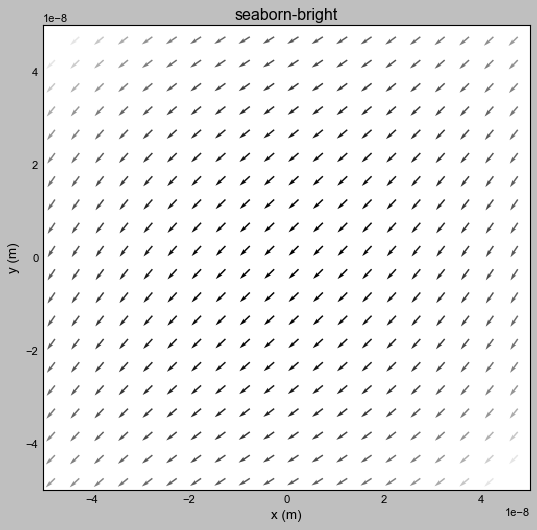

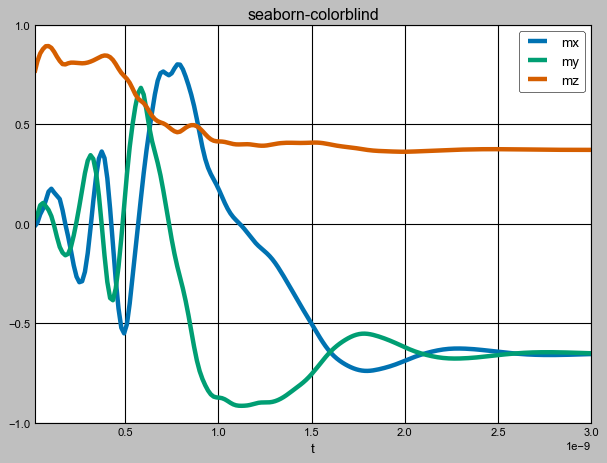

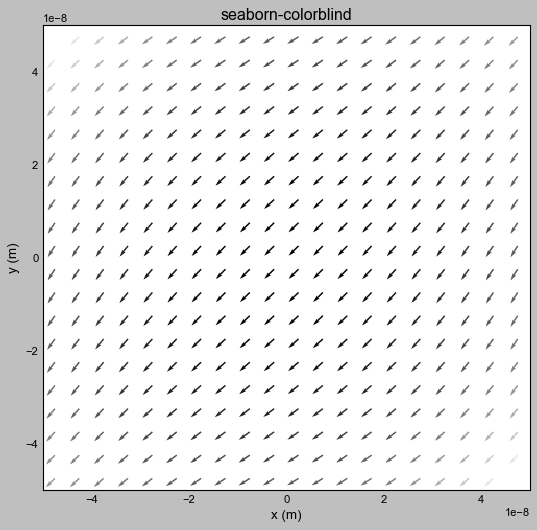

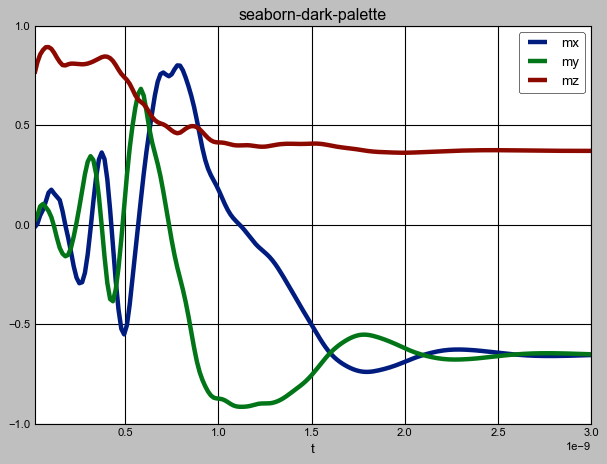

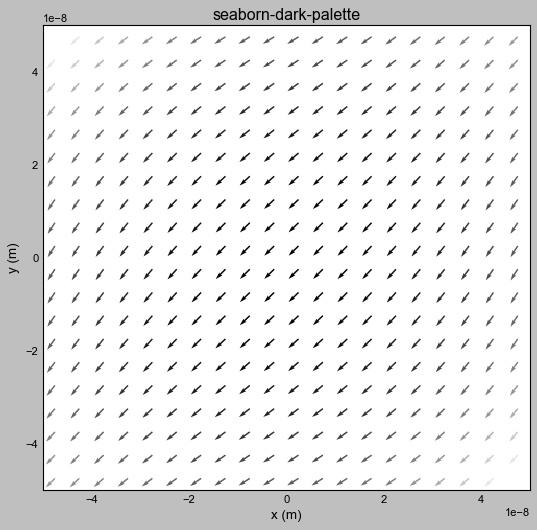

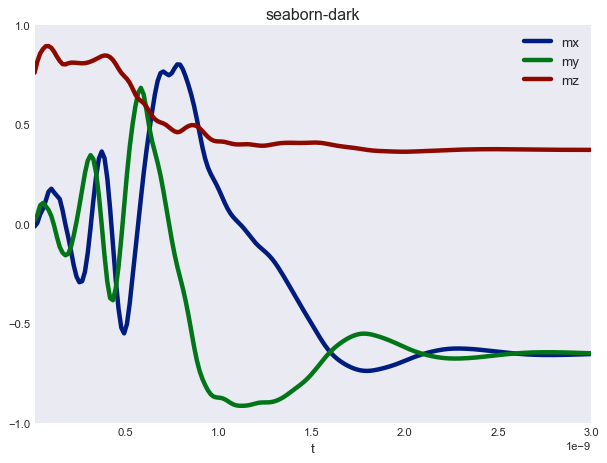

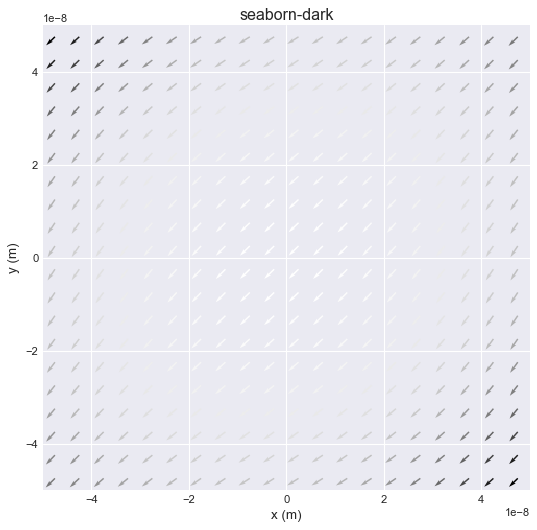

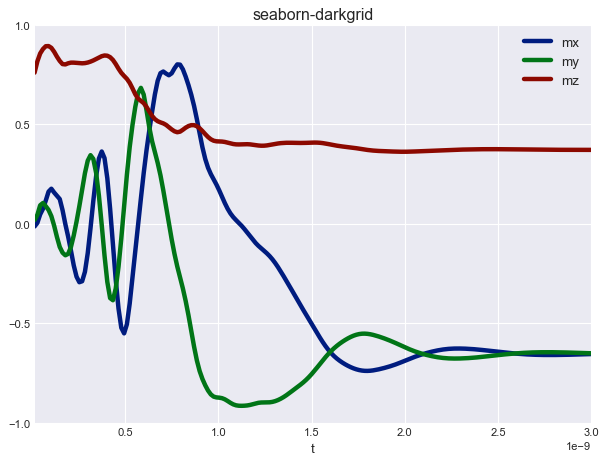

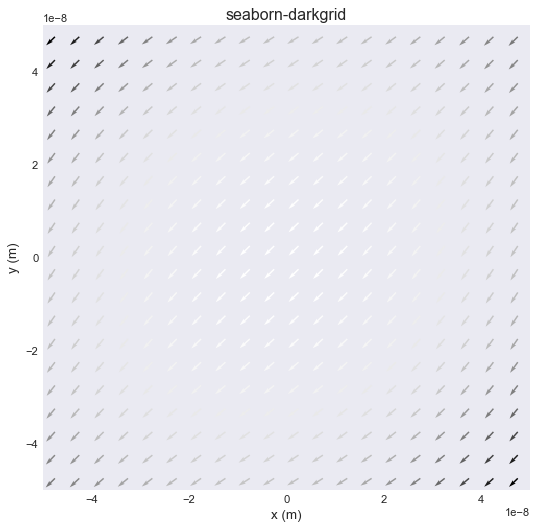

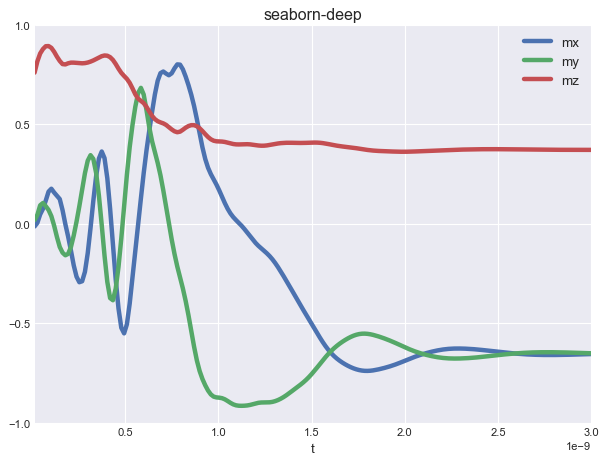

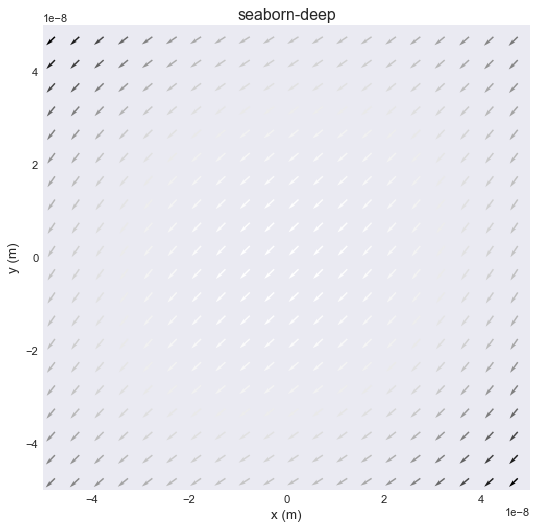

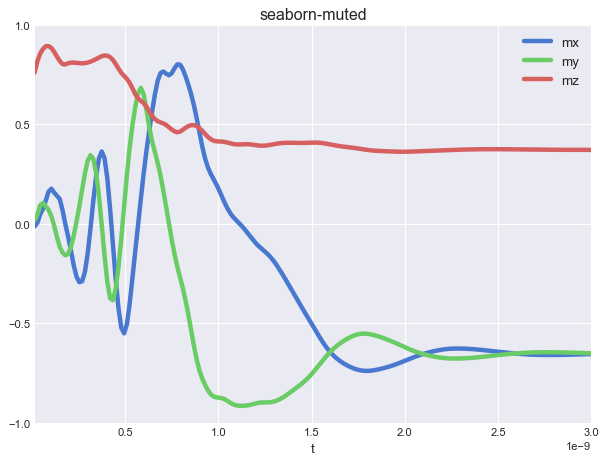

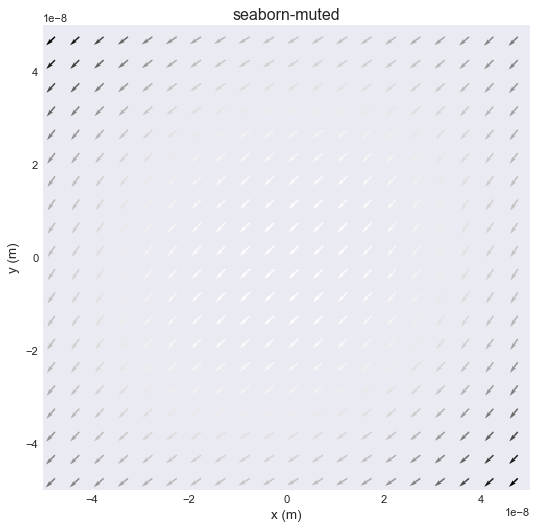

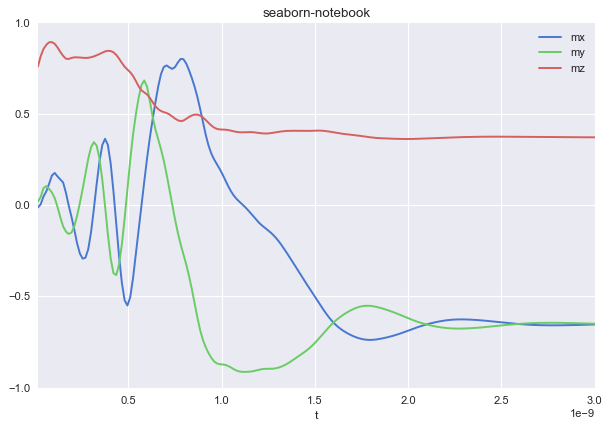

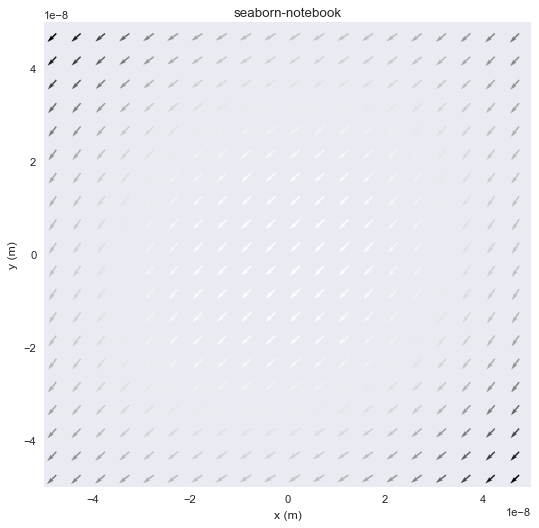

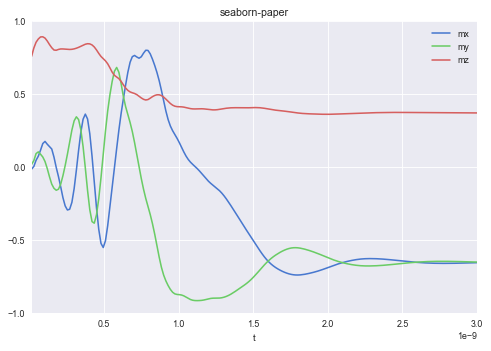

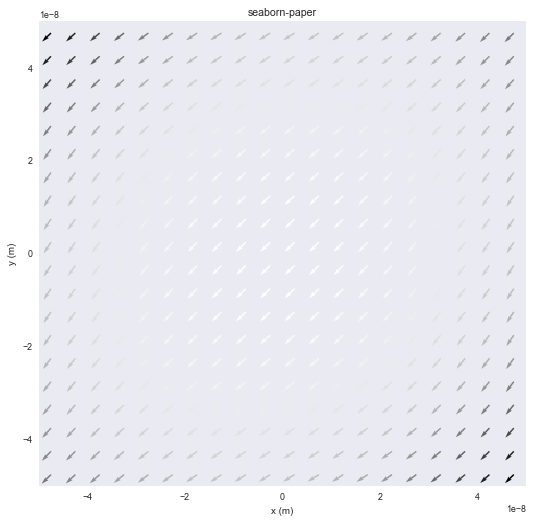

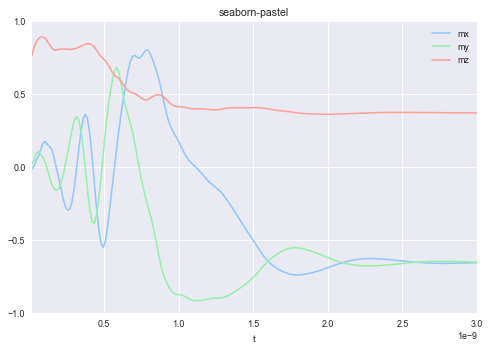

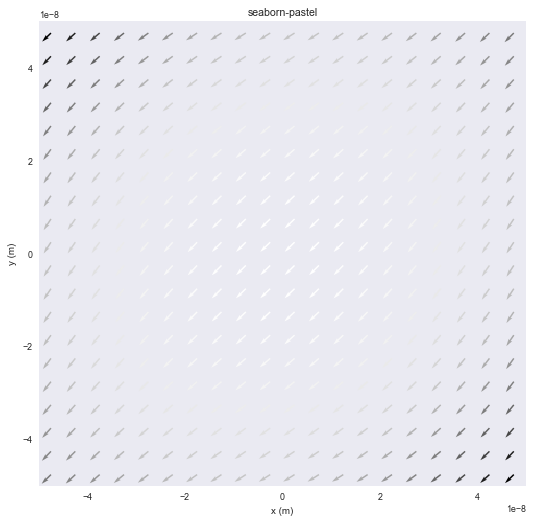

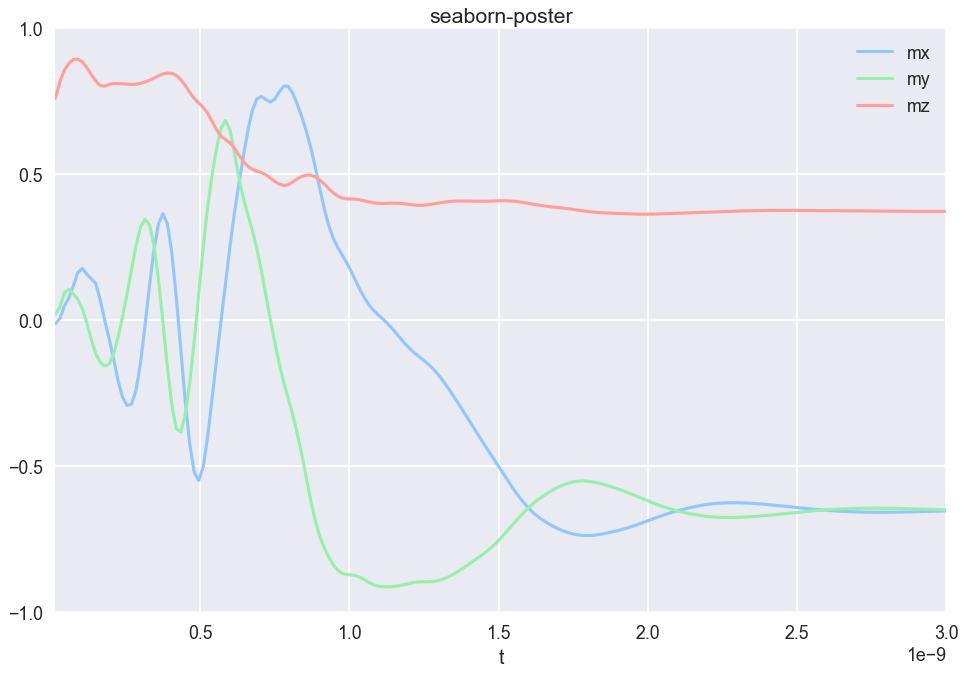

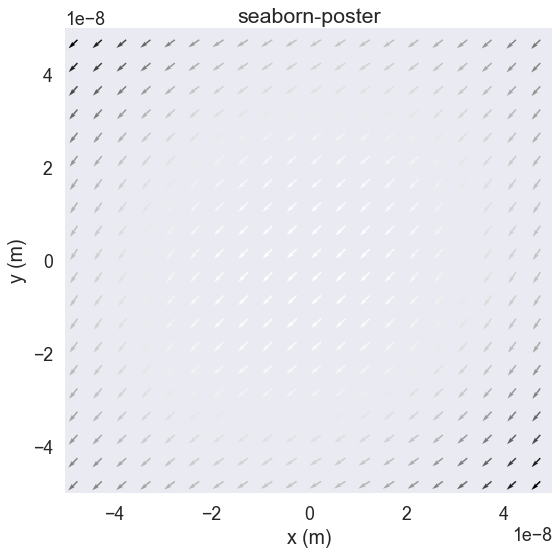

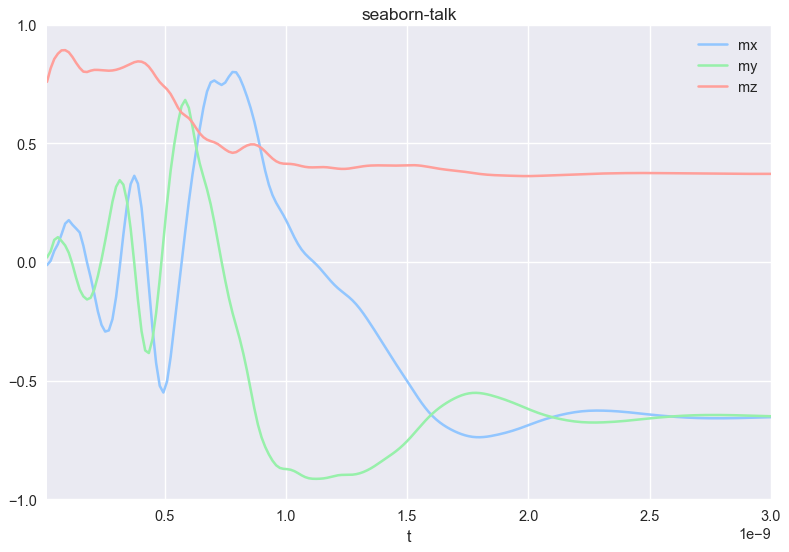

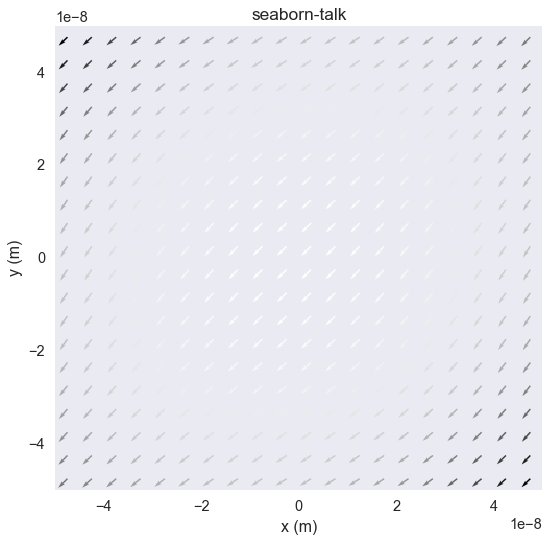

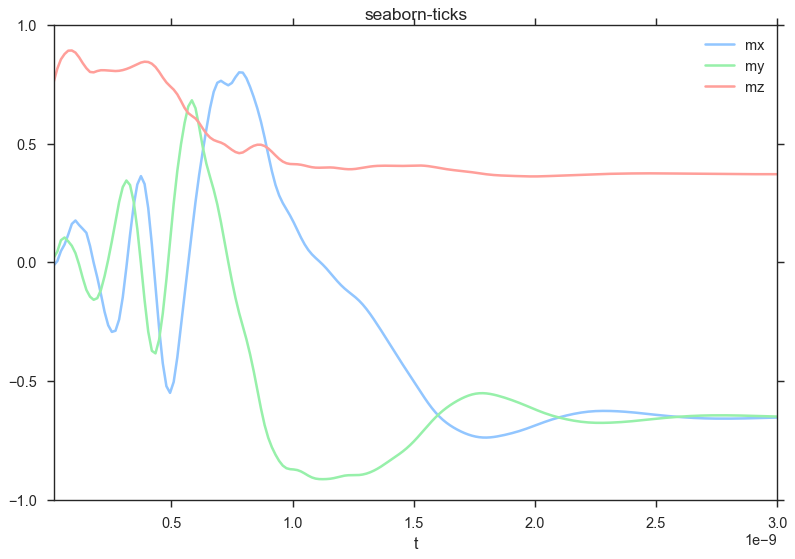

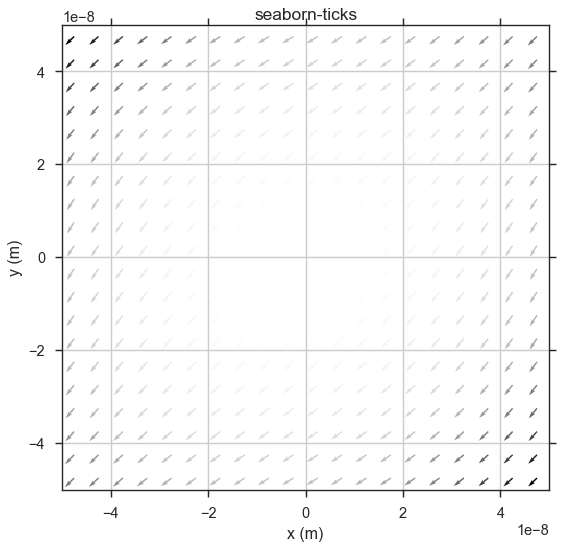

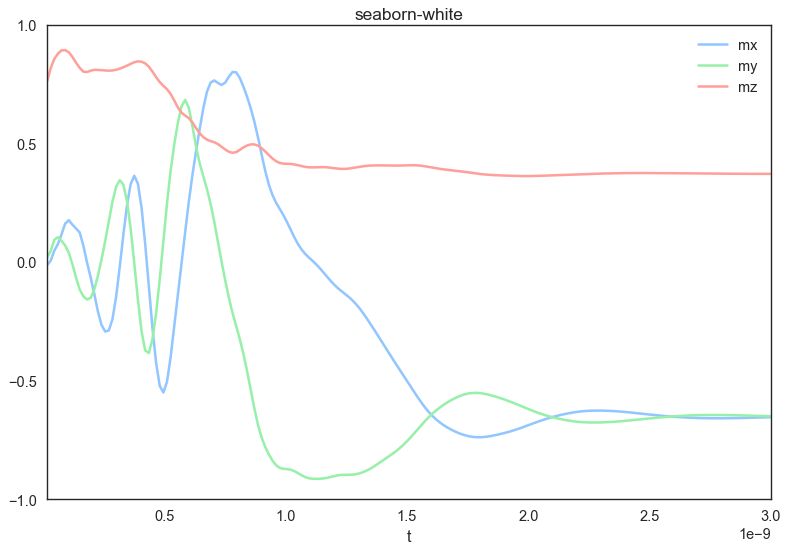

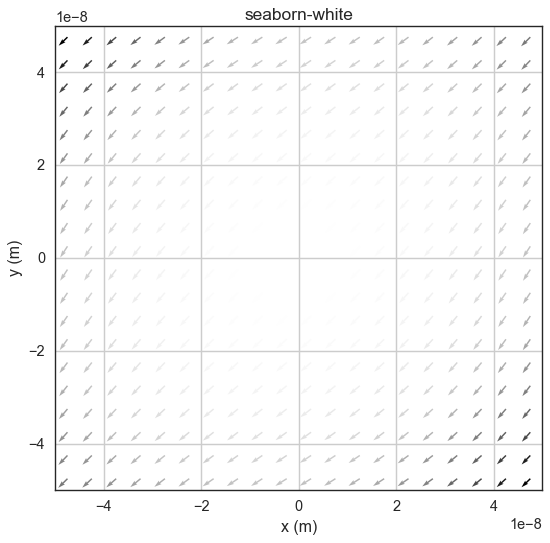

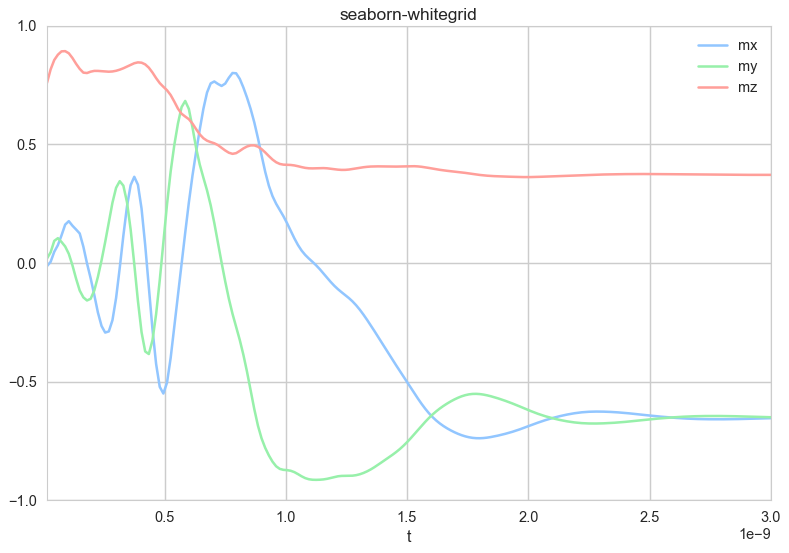

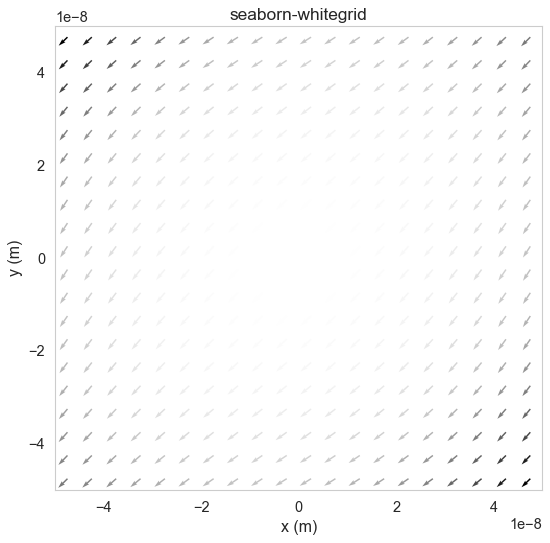

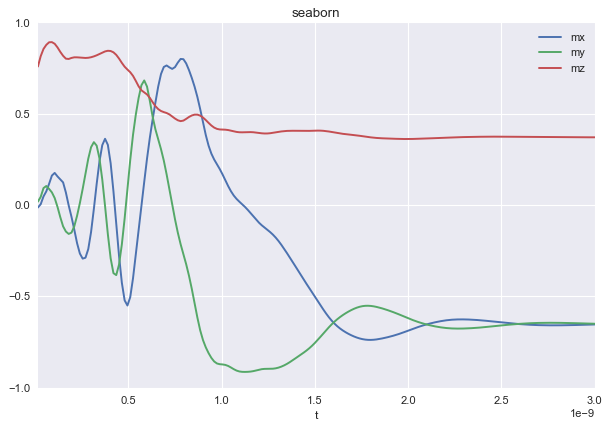

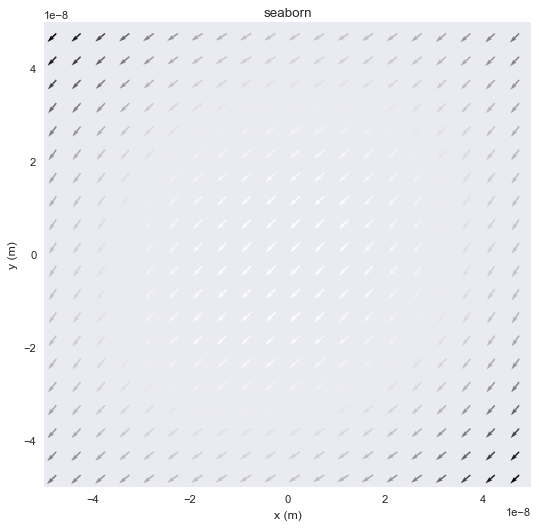

In [8]:
import pylab
for style in plt.style.available:
    print("This is style {}".format(style))
    plt.style.use(style)
    fig, ax1 = plt.subplots(1, 1)
    system.dt.plot('t', ['mx', 'my','mz'],ax=ax1)
    ax1.set_title(style)
    
    # for m.plot, we currentyl can't give an axis object to it.
    system.m.plot_slice("z", 0, xsize=7);
    # so we catch the axis after it has been created:
    ax2 = pylab.gca()
    ax2.set_title(style)
    
    # system.m.plot_line_intersection(p1=(-49e-9, 0, 0), p2=(49e-9, 0, 0))
